In [13]:
from ffipy import FFIEC_Client
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
failed_banks = pd.read_csv('data/failed_banks_dataset.csv')
len(failed_banks)

556

In [5]:
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 7 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [6]:
failed_banks['Date'] = pd.to_datetime(failed_banks['Closing Date'])
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
Bank Name                556 non-null object
City                     556 non-null object
ST                       556 non-null object
CERT                     556 non-null int64
Acquiring Institution    556 non-null object
Closing Date             556 non-null object
Updated Date             556 non-null object
Date                     556 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 34.8+ KB


In [7]:
failed_banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.",31-May-19,22-Aug-19,2019-05-31
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,24-Jul-19,2017-12-15
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,12-Aug-19,2017-10-13
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,29-Jan-19,2017-05-26
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18,2017-05-05


In [11]:
failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count()

Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
2019      1
Name: Bank Name, dtype: int64

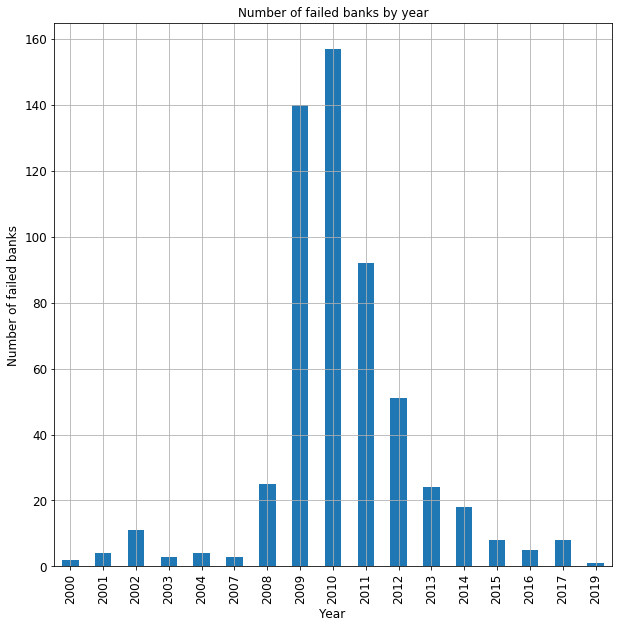

In [27]:
ax = failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count().plot(
    kind='bar', title ="Number of failed banks by year", figsize=(10, 10), legend=False, fontsize=12, )
ax.grid()
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of failed banks", fontsize=12)
plt.show()

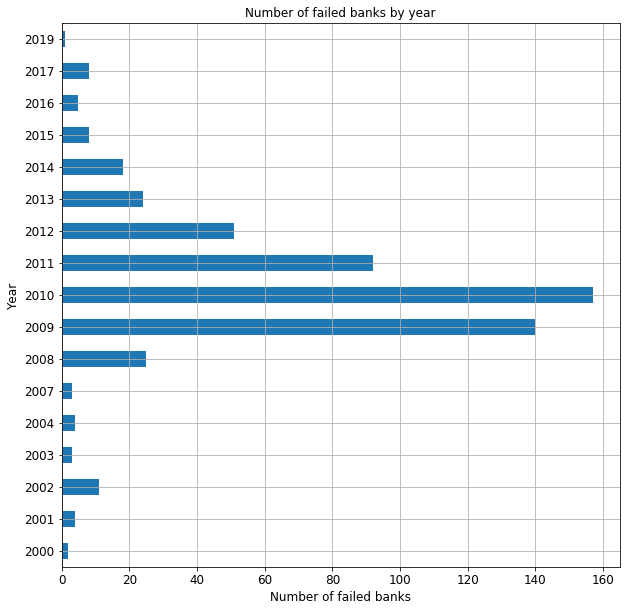

In [28]:
ax = failed_banks.groupby(failed_banks.Date.dt.year)['Bank Name'].count().plot(
    kind='barh', title ="Number of failed banks by year", figsize=(10, 10), legend=False, fontsize=12)
ax.grid()
ax.set_xlabel("Number of failed banks", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
plt.show()

In [3]:
client = FFIEC_Client()


In [ ]:
client = FFIEC_Client()
# get a list of RSSD codes for filers on 3/31/2019
filers_RSSD_03312019 = client.retrieve_filers_since_date(ds_name='Call',
                                   reporting_pd_end='3/31/2019',
                                   last_update_date='3/31/2019')
# check how many filers - 5908
len(filers_RSSD_03312019)